In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

shared_dir = '/Users/prateek/Desktop/ML/Major/aug'
input_shape = [32, 32]
batch = 32

training_set = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="training",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

val_dataset = image_dataset_from_directory(shared_dir,
                                            validation_split=0.2,
                                            subset="validation",
                                            batch_size=batch,
                                            seed=1,
                                            color_mode='rgb',
                                            image_size=input_shape)

input_shape.append(3)
print(input_shape)

Found 156440 files belonging to 2 classes.
Using 125152 files for training.


2022-04-24 11:46:51.599271: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-24 11:46:51.599431: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 156440 files belonging to 2 classes.
Using 31288 files for validation.
[32, 32, 3]


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from keras import Model, Input
from keras.applications.xception import Xception, preprocess_input
import keras

epochs = 300
dropout_rate = 0.2
len_classes = 5

inputs = Input(shape=input_shape)
x = preprocess_input(inputs)
x = Conv2D(16, kernel_size=(3, 3),activation='relu',input_shape=input_shape)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(8, kernel_size=(4, 4),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(4, kernel_size=(3, 3),activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(2, kernel_size=(2, 2),activation='relu')(x)
x = MaxPooling2D(pool_size=(1, 1))(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=1, strides=1)(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(filters=len_classes, kernel_size=1, strides=1)(x)
x = tf.keras.layers.Dropout(dropout_rate)(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.GlobalMaxPooling2D()(x)

x = Flatten()(x)
outputs = Dense(1)(x)
model = Model(inputs, outputs)
model.summary()
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(from_logits=True),metrics=keras.metrics.BinaryAccuracy())


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 32, 32, 3)        0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 32, 32, 3)        0         
 a)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                             

In [3]:

history = model.fit(training_set, epochs=epochs, validation_data=val_dataset)

Epoch 1/300


2022-04-24 11:46:55.109565: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-24 11:46:55.110184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3909/3911 [============================>.] - ETA: 0s - loss: 0.3759 - binary_accuracy: 0.8847

2022-04-24 11:48:08.382479: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


3911/3911 [==============================] - 84s 21ms/step - loss: 0.3760 - binary_accuracy: 0.8846 - val_loss: 0.3489 - val_binary_accuracy: 0.8897
Epoch 2/300
3911/3911 [==============================] - 81s 21ms/step - loss: 0.3545 - binary_accuracy: 0.8868 - val_loss: 0.3488 - val_binary_accuracy: 0.8897
Epoch 3/300
3911/3911 [==============================] - 76s 19ms/step - loss: 0.3541 - binary_accuracy: 0.8868 - val_loss: 0.3474 - val_binary_accuracy: 0.8897
Epoch 4/300
3911/3911 [==============================] - 85s 22ms/step - loss: 0.3538 - binary_accuracy: 0.8868 - val_loss: 0.3477 - val_binary_accuracy: 0.8897
Epoch 5/300
3911/3911 [==============================] - 141s 36ms/step - loss: 0.3538 - binary_accuracy: 0.8868 - val_loss: 0.3473 - val_binary_accuracy: 0.8897
Epoch 6/300
3911/3911 [==============================] - 139s 35ms/step - loss: 0.3535 - binary_accuracy: 0.8868 - val_loss: 0.3472 - val_binary_accuracy: 0.8897
Epoch 7/300
3911/3911 [=====================

loss
binary_accuracy
val_loss
val_binary_accuracy


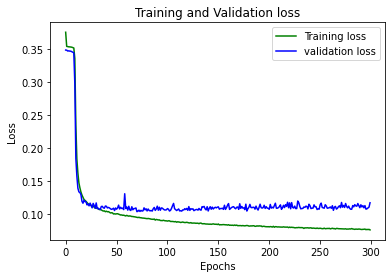

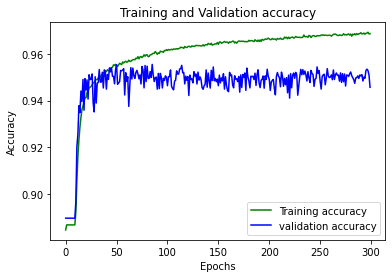

In [4]:
import matplotlib.pyplot as plt

for key in history.history.keys():
    print(key)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epoch = range(epochs)
plt.plot(epoch, loss_train, 'g', label='Training loss')
plt.plot(epoch, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss_train = history.history['binary_accuracy']
loss_val = history.history['val_binary_accuracy']
plt.plot(epoch, loss_train, 'g', label='Training accuracy')
plt.plot(epoch, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=tf.keras.metrics.BinaryAccuracy())
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs
%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

In [5]:
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
# rm -rf logs

%load_ext tensorboard
log_folder = 'logs'
callbacks = [
            EarlyStopping(patience = 5),
            TensorBoard(log_dir=log_folder)
            ]

model.fit(training_set, epochs=50,validation_data=val_dataset,callbacks=callbacks)

Epoch 1/50
3911/3911 [==============================] - 149s 38ms/step - loss: 0.0764 - binary_accuracy: 0.9689 - val_loss: 0.1143 - val_binary_accuracy: 0.9482
Epoch 2/50
3911/3911 [==============================] - 131s 33ms/step - loss: 0.0762 - binary_accuracy: 0.9693 - val_loss: 0.1187 - val_binary_accuracy: 0.9460
Epoch 3/50
3911/3911 [==============================] - 3075s 786ms/step - loss: 0.0775 - binary_accuracy: 0.9683 - val_loss: 0.1130 - val_binary_accuracy: 0.9483
Epoch 4/50
3911/3911 [==============================] - 17869s 5s/step - loss: 0.0763 - binary_accuracy: 0.9690 - val_loss: 0.1111 - val_binary_accuracy: 0.9511
Epoch 5/50
3911/3911 [==============================] - 12378s 3s/step - loss: 0.0762 - binary_accuracy: 0.9691 - val_loss: 0.1138 - val_binary_accuracy: 0.9492
Epoch 6/50
3911/3911 [==============================] - 98s 25ms/step - loss: 0.0764 - binary_accuracy: 0.9687 - val_loss: 0.1148 - val_binary_accuracy: 0.9489
Epoch 7/50
3911/3911 [===========

In [8]:
acc = max(loss_val)
print(acc)
print(loss_val.index(acc))

0.9555100798606873
85
